In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt


In [ ]:
!cp  '/content/drive/MyDrive/cnn/fire_detection.zip' '/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip fire_detection.zip

Archive:  fire_detection.zip
  inflating: forest_fire/Testing/fire/abc169.jpg  
  inflating: forest_fire/Testing/fire/abc170.jpg  
  inflating: forest_fire/Testing/fire/abc171.jpg  
  inflating: forest_fire/Testing/fire/abc172.jpg  
  inflating: forest_fire/Testing/fire/abc173.jpg  
  inflating: forest_fire/Testing/fire/abc174.jpg  
  inflating: forest_fire/Testing/fire/abc175.jpg  
  inflating: forest_fire/Testing/fire/abc176.jpg  
  inflating: forest_fire/Testing/fire/abc177.jpg  
  inflating: forest_fire/Testing/fire/abc178.jpg  
  inflating: forest_fire/Testing/fire/abc179.jpg  
  inflating: forest_fire/Testing/fire/abc180.jpg  
  inflating: forest_fire/Testing/fire/abc181.jpg  
  inflating: forest_fire/Testing/fire/abc182.jpg  
  inflating: forest_fire/Testing/fire/abc183.jpg  
  inflating: forest_fire/Testing/fire/abc184.jpg  
  inflating: forest_fire/Testing/fire/abc185.jpg  
  inflating: forest_fire/Testing/fire/abc186.jpg  
  inflating: forest_fire/Testing/fire/abc187.jpg  
  

In [ ]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

train_dataset=train.flow_from_directory('/content/forest_fire/Training and Validation',
                                        target_size=(150,150),
                                        batch_size=32,
                                        class_mode='binary')
test_dataset=test.flow_from_directory('/content/forest_fire/Testing',
                                      target_size=(150,150),
                                      batch_size=32,
                                      class_mode='binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))




In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
58/58 [==============================] - 119s 2s/step - loss: 0.3343 - accuracy: 0.8657 - val_loss: 0.3169 - val_accuracy: 0.8824
Epoch 2/5
58/58 [==============================] - 115s 2s/step - loss: 0.1504 - accuracy: 0.9509 - val_loss: 0.3066 - val_accuracy: 0.8676
Epoch 3/5
58/58 [==============================] - 149s 3s/step - loss: 0.1598 - accuracy: 0.9525 - val_loss: 0.2904 - val_accuracy: 0.8971
Epoch 4/5
58/58 [==============================] - 129s 2s/step - loss: 0.1140 - accuracy: 0.9607 - val_loss: 0.2840 - val_accuracy: 0.8676
Epoch 5/5
58/58 [==============================] - 133s 2s/step - loss: 0.1018 - accuracy: 0.9689 - val_loss: 0.1894 - val_accuracy: 0.8824


In [ ]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

3/3 [==============================] - 1s 247ms/step


In [ ]:
predictions

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
print(len(predictions))


68


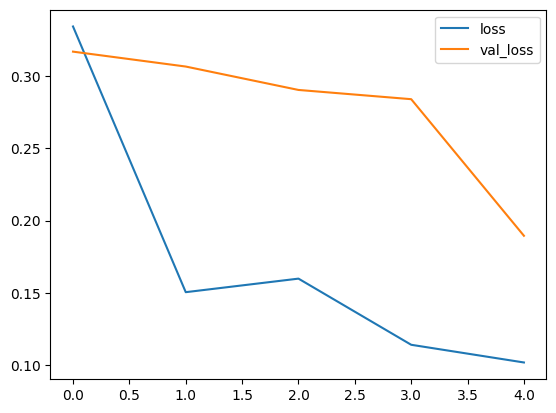

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()


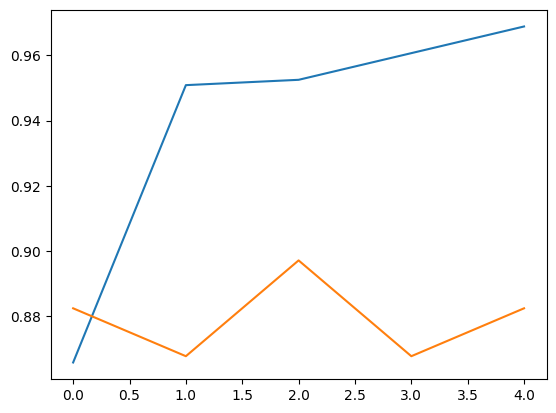

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')

In [ ]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(150,150))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  val=model.predict(x)
  print(val)
  if val==1:
    plt.xlabel("no fire",fontsize=30)
  elif val==0:
    plt.xlabel("fire",fontsize=30)

1/1 [==============================] - 0s 130ms/step
[[0.]]


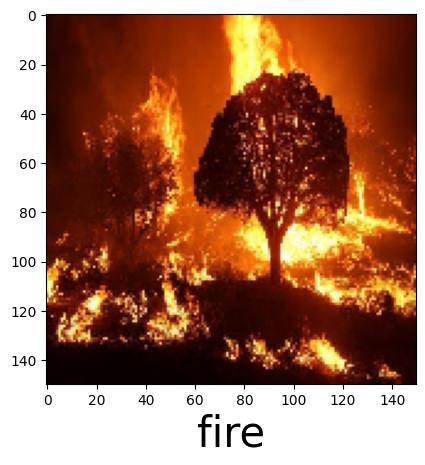

In [ ]:
predictImage('/content/Burnout_ops_on_Mangum_Fire_McCall_Smokejumpers.jpg')

1/1 [==============================] - 0s 59ms/step
[[1.]]


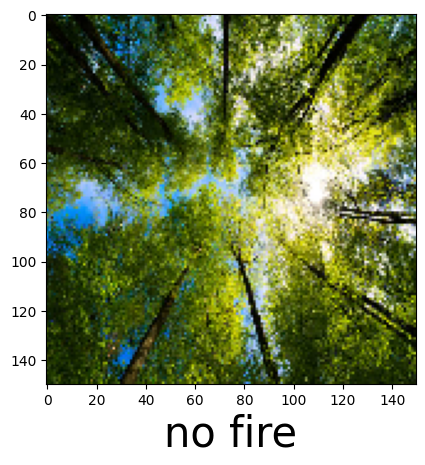

In [ ]:
predictImage('/content/istockphoto-1317323736-612x612.jpg')